In [1]:
import time

# Record start time
start_time = time.time()

# Your program code here
# Example:

In [2]:
# Import Data Profile Excel file name 'ProcessParasProfileUTL'
import polars as pl

# Specify the path to your Excel file and the sheet names to import
excel_path = 'PPP.xlsx'
sheet_names = ['ProcessParasProfileUTL']

# Read each specified sheet into a dictionary of DataFrames
dfs2 = {}
for sheet in sheet_names:
    dfs2[sheet] = pl.read_excel(
        excel_path,
        sheet_name=sheet  # Specifies which sheet to read
    )

# Access the DataFrame using the sheet name as the key
df4 = dfs2['ProcessParasProfileUTL']

In [3]:
# Convert the column to string (Utf8)
df4 = df4.with_columns(
    pl.col("ParaKey").cast(pl.Utf8)  # Cast to string
)
df4

EquipOpn,Sno,ParaGroup,ParaName,Unit,ParaKey,Active,EquipModel,SpecRevision,ParaClass
str,i64,str,str,str,str,i64,str,str,str
"""WSW""",21,"""Parameter Description""","""CH1_SPD[x]""","""NA""","""4280""",1,"""DFD6560""","""UTL1IED""","""ECID"""
"""WSW""",22,"""Parameter Description""","""CH2_SPD[x]""","""NA""","""4290""",1,"""DFD6560""","""UTL1IED""","""ECID"""
"""WSW""",23,"""Parameter Description""","""Chipping size Z1""","""nm""","""1404""",1,"""DFD6560""","""UTL1IED""","""SVID"""
"""WSW""",26,"""Parameter Description""","""Chipping size Z2""","""nm""","""1405""",1,"""DFD6560""","""UTL1IED""","""SVID"""
"""WSW""",27,"""Parameter Description""","""CO2 Injector Resitivity""","""kOhmcm""","""3223""",1,"""DFD6560""","""UTL1IED""","""SVID"""
…,…,…,…,…,…,…,…,…,…
"""WSW""",73,"""Parameter Description""","""Spindle rev. Z1 (Set in recipe…","""nm""","""4204""",1,"""DFD6560""","""UTL1IED""","""ECID"""
"""WSW""",73,"""Parameter Description""","""Atomizing nozzle clean air pre…","""nm""","""1785""",1,"""DFD6560""","""UTL1IED""","""SVID"""
"""WSW""",74,"""Parameter Description""","""Spindle rev. Z2 (Set in recipe…","""nm""","""4205""",1,"""DFD6560""","""UTL1IED""","""ECID"""


In [4]:
import polars as pl
import os

# Set the path to your folder containing 'PPCDataUTL' Excel files
folder_path = 'myfolder'

# Initialize a list to collect DataFrames
dfs_list = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):  # Process only .xlsx files
        excel_path = os.path.join(folder_path, filename)
        
        try:
            # Read the Excel file (defaults to first sheet)
            df = pl.read_excel(excel_path)
            dfs_list.append(df)
            
        except Exception as e:
            print(f"Error reading file {filename}: {e}")
            continue

# Combine all DataFrames (handles empty case gracefully)
df3 = pl.concat(dfs_list) if dfs_list else pl.DataFrame()

# Drop columns and sort
if not df3.is_empty():
    df3 = (
        df3
        .drop(['EquipOpn', 'ULotID', 'EventID'])  # Remove columns
        .sort(by=['EquipID', 'CreateTime'])  # Sort
        # .with_row_count("index")  # Optional: Add index column if needed
    )

# print("Data has been read from all files and combined into df3")

In [5]:
import polars as pl

# Define the column names and their corresponding data types
col_ECID = {'EquipID':'object', 'CreateTime':'datetime64[ns]','CreateTimeUnix':'int64','EventDesc':'object','4280':'int64','4290':'int64','6603':'int64','6611':'int64',
            '6607':'int64','6615':'int64','4628':'int64','4629':'int64','6641':'int64','16009':'int64','16058':'int64',
            '6640':'int64','16008':'int64','16057':'int64','6636':'int64','16004':'int64','16053':'int64','6637':'int64',
            '16005':'int64','16054':'int64','6666':'int64','16034':'int64','16132':'int64','4204':'int64','4205':'int64'}

# Map Pandas-style data types to Polars data types
dtype_mapping = {
    'object': pl.Utf8,
    'datetime64[ns]': pl.Datetime,
    'float32': pl.Float32,
    'int64': pl.Int64
}

# Create a schema dictionary with Polars data types
polars_schema = {
    col: dtype_mapping[dtype] 
    for col, dtype in col_ECID.items()
}

# Initialize an empty DataFrame with the specified schema
ECID = pl.DataFrame({
    col: pl.Series(name=col, dtype=dt) 
    for col, dt in polars_schema.items()
})

#print(ECID)

In [6]:
import polars as pl

# Define the column names and their corresponding data types
col_SVID = {'EquipID':'object', 'CreateTime':'datetime64[ns]','CreateTimeUnix':'int64','EventDesc':'object','1404':'int64','1405':'int64','3223':'int64','1412':'int64',
            '1413':'int64','1400':'int64','1401':'int64','1763':'int64','1765':'int64','1352':'int64','1353':'int64',
            '1771':'int64','1775':'int64','1502':'int64','1503':'int64','1760':'int64','1759':'int64','1755':'int64',
            '1756':'int64','1500':'int64','1501':'int64','1785':'int64','1764':'int64','1766':'int64'}

# Map Pandas-style data types to Polars data types
dtype_mapping = {
    'object': pl.Utf8,
    'datetime64[ns]': pl.Datetime,
    'float32': pl.Float32,
    'int64': pl.Int64
}

# Create a schema dictionary with Polars data types
polars_schema = {
    col: dtype_mapping[dtype] 
    for col, dtype in col_SVID.items()
}

# Initialize an empty DataFrame with the specified schema
SVID = pl.DataFrame({
    col: pl.Series(name=col, dtype=dt) 
    for col, dt in polars_schema.items()
})

#print(SVID)

In [7]:
from tqdm import tqdm
import polars as pl

def get_parameter(s):
    pairs = s.split(',')
    parameter = {}
    for pair in pairs:
        key_str, value_str = pair.split(':')
        key = int(key_str)
        if value_str != 'System.Byte[]':
            value = int(value_str)
            parameter[key] = value
    return parameter

# Initialize lists to collect new rows for SVID and ECID
svid_rows = []
ecid_rows = []

# Iterate over each row in df3 with a progress bar
for row in tqdm(df3.iter_rows(named=True), desc="Processing rows"):
    # Extract the parameters string from the 'parameters' column (adjust column name if necessary)
    param_str = row['Parameter']
    # Parse the parameters string into a dictionary
    param_dict = get_parameter(param_str)
    # Add additional columns from the current row
    param_dict.update({
        'EquipID': row['EquipID'],
        'CreateTime': row['CreateTime'],
        'EventDesc': row['EventDesc']
    })
    # Convert all keys to strings
    param_dict = {str(k): v for k, v in param_dict.items()}
    
    # Check for SVID record (key '1404' with value > 0)
    svid_value = param_dict.get('1404', 0)
    if svid_value > 0:
        # Create a row with columns matching SVID's schema, filling missing keys with None
        svid_row = {col: param_dict.get(col, None) for col in SVID.columns}
        svid_rows.append(svid_row)
    
    # Check for ECID record (key '4280' with value > 0)
    ecid_value = param_dict.get('4280', 0)
    if ecid_value > 0:
        # Create a row with columns matching ECID's schema, filling missing keys with None
        ecid_row = {col: param_dict.get(col, None) for col in ECID.columns}
        ecid_rows.append(ecid_row)

# Append collected rows to SVID and ECID DataFrames
#if svid_rows:
    #SVID = pl.concat([SVID, pl.DataFrame(svid_rows)])
#if ecid_rows:
    #ECID = pl.concat([ECID, pl.DataFrame(ecid_rows)])

Processing rows: 5000it [00:00, 20359.53it/s]


In [8]:
import pandas as pd
SVID = pd.DataFrame(svid_rows)
SVID['CreateTimeUnix'] = SVID['CreateTime'].astype('int64') // 10**9
SVID.sort_values(by=['EquipID', 'CreateTime'])
#SVID_polars = pl.from_pandas(SVID)
SVID = pl.from_pandas(SVID)

ECID = pd.DataFrame(ecid_rows)
ECID['CreateTimeUnix'] = ECID['CreateTime'].astype('int64') // 10**9
ECID.sort_values(by=['EquipID', 'CreateTime'])
#ECID_polars = pl.from_pandas(ECID)
ECID = pl.from_pandas(ECID)

df3 = df3.with_columns(
    pl.col("CreateTime").dt.epoch('s').alias("CreateTimeUnix")
)

In [9]:
# Memory release 
svid_rows = []
ecid_rows = []

In [10]:
SVID

EquipID,CreateTime,CreateTimeUnix,EventDesc,1404,1405,3223,1412,1413,1400,1401,1763,1765,1352,1353,1771,1775,1502,1503,1760,1759,1755,1756,1500,1501,1785,1764,1766
str,datetime[ns],i64,str,i64,i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""TSWD036""",2025-03-19 23:35:15.380,1742427315,"""Kerf Check Start""",6902,6902,null,62118,38454,3944,986,1150,1080,370078,323596,0,0,1150,1060,205,205,135,129,54940,49960,424,54940,50000
"""TSWD036""",2025-03-19 23:35:28.750,1742427328,"""Kerf Check End""",12818,4930,null,63104,37468,-493,-3451,1150,1080,370078,323596,0,0,1150,1080,205,206,136,129,54980,49960,423,54940,50000
"""TSWD036""",2025-03-19 23:36:49,1742427409,"""Kerf Check Start""",12818,4930,null,63104,37468,-493,-3451,1150,1060,370078,323596,0,0,1150,1080,205,205,136,129,54980,49960,424,54940,49960
"""TSWD036""",2025-03-19 23:36:55.660,1742427415,"""Kerf Check End""",12818,8874,null,63104,39440,-493,493,1150,1080,370078,323596,0,0,1130,1060,205,205,136,128,54940,49960,423,54980,49960
"""TSWD036""",2025-03-19 23:37:21.760,1742427441,"""Kerf Check Start""",12818,8874,null,63104,39440,-493,493,1150,1080,370078,323596,0,0,1130,1080,204,205,135,128,54940,50000,424,54940,49960
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TSWD299""",2025-03-19 23:58:28.303,1742428708,"""Kerf Check Start""",2946,1964,282.0,36334,24550,-982,982,790,820,186182,211582,0,0,790,820,207,205,131,206,49950,50000,202,49950,50000
"""TSWD299""",2025-03-19 23:58:42.307,1742428722,"""Kerf Check End""",6874,14730,283.0,37316,25532,491,-491,1140,1150,186182,211582,925,925,1160,1170,207,205,131,206,49950,49950,202,50000,49950
"""TSWD299""",2025-03-19 23:59:08.983,1742428748,"""Kerf Check Start""",6874,14730,290.0,37316,25532,491,-491,810,820,186182,211582,0,0,770,820,207,205,131,206,50000,49950,202,50000,49950


In [11]:
ECID

EquipID,CreateTime,CreateTimeUnix,EventDesc,4280,4290,6603,6611,6607,6615,4628,4629,6641,16009,16058,6640,16008,16057,6636,16004,16053,6637,16005,16054,6666,16034,16132,4204,4205
str,datetime[ns],i64,str,i64,i64,f64,f64,f64,f64,i64,i64,f64,str,str,f64,str,str,f64,str,str,f64,str,str,f64,str,str,i64,i64
"""TSWD036""",2025-03-19 23:35:15.370,1742427315,"""Kerf Check Start""",20320000,20320000,null,null,null,null,5080,5080,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,55000,50000
"""TSWD036""",2025-03-19 23:35:28.743,1742427328,"""Kerf Check End""",20320000,20320000,null,null,null,null,5080,5080,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,55000,50000
"""TSWD036""",2025-03-19 23:36:48.993,1742427408,"""Kerf Check Start""",20320000,20320000,null,null,null,null,5080,5080,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,55000,50000
"""TSWD036""",2025-03-19 23:36:55.647,1742427415,"""Kerf Check End""",20320000,20320000,null,null,null,null,5080,5080,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,55000,50000
"""TSWD036""",2025-03-19 23:37:21.747,1742427441,"""Kerf Check Start""",20320000,20320000,null,null,null,null,5080,5080,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,55000,50000
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TSWD299""",2025-03-19 23:58:28.117,1742428708,"""Kerf Check Start""",50800000,50800000,1000.0,800.0,1000.0,800.0,3810,3810,-700.0,null,null,-700.0,null,null,-650.0,null,null,-700.0,null,null,200.0,null,null,50000,50000
"""TSWD299""",2025-03-19 23:58:42.090,1742428722,"""Kerf Check End""",50800000,50800000,1000.0,800.0,1000.0,800.0,3810,3810,-700.0,null,null,-700.0,null,null,-650.0,null,null,-700.0,null,null,200.0,null,null,50000,50000
"""TSWD299""",2025-03-19 23:59:08.797,1742428748,"""Kerf Check Start""",50800000,50800000,1000.0,800.0,1000.0,800.0,3810,3810,-700.0,null,null,-700.0,null,null,-650.0,null,null,-700.0,null,null,200.0,null,null,50000,50000


In [12]:
df3

EquipID,Recipe,Parameter,CreateTime,EventDesc,SAW_ProductionStock_Z1,BladeOD_Z1,BladeThickness_Z1,FlangeODType_Z1,SAW_ProductionStock_Z2,BladeOD_Z2,BladeThickness_Z2,FlangeODType_Z2,CreateTimeUnix
str,str,str,datetime[ms],str,str,f64,f64,str,str,f64,f64,str,i64
"""TSWD036""","""STM0533P_J_1""","""4280:20320000,4290:20320000,66…",2025-03-19 23:35:15.370,"""Kerf Check Start""","""SW00000144""",2.1874,0.0019,"""Hub""","""SW00000146""",2.1874,0.0014,"""Hub""",1742427315
"""TSWD036""","""STM0533P_J_1""","""1404:6902,1405:6902,3223:Syste…",2025-03-19 23:35:15.380,"""Kerf Check Start""","""SW00000144""",2.1874,0.0019,"""Hub""","""SW00000146""",2.1874,0.0014,"""Hub""",1742427315
"""TSWD036""","""STM0533P_J_1""","""4280:20320000,4290:20320000,66…",2025-03-19 23:35:28.743,"""Kerf Check End""","""SW00000144""",2.1874,0.0019,"""Hub""","""SW00000146""",2.1874,0.0014,"""Hub""",1742427328
"""TSWD036""","""STM0533P_J_1""","""1404:12818,1405:4930,3223:Syst…",2025-03-19 23:35:28.750,"""Kerf Check End""","""SW00000144""",2.1874,0.0019,"""Hub""","""SW00000146""",2.1874,0.0014,"""Hub""",1742427328
"""TSWD036""","""STM0533P_J_1""","""4280:20320000,4290:20320000,66…",2025-03-19 23:36:48.993,"""Kerf Check Start""","""SW00000144""",2.1874,0.0019,"""Hub""","""SW00000146""",2.1874,0.0014,"""Hub""",1742427408
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""TSWD299""","""ISL0593P_D_3""","""1404:6874,1405:14730,3223:290,…",2025-03-19 23:59:08.983,"""Kerf Check Start""","""SW00000156""",2.1874,0.0014,"""Hub""","""SW00000159""",2.1874,0.035,"""Hub""",1742428748
"""TSWD299""","""ISL0593P_D_3""","""4280:50800000,4290:50800000,66…",2025-03-19 23:59:17.880,"""Kerf Check End""","""SW00000156""",2.1874,0.0014,"""Hub""","""SW00000159""",2.1874,0.035,"""Hub""",1742428757
"""TSWD299""","""ISL0593P_D_3""","""1404:6874,1405:2946,3223:293,1…",2025-03-19 23:59:18.067,"""Kerf Check End""","""SW00000156""",2.1874,0.0014,"""Hub""","""SW00000159""",2.1874,0.035,"""Hub""",1742428758


In [13]:
import duckdb
# Configure DuckDB to work in memory-constrained environments
duckdb.execute("SET temp_directory='C:/Users/RYZEN/datamining/saw/temp';")  # Use SSD if possible

# Query directly on the DataFrame (no need to load into a database)
result = duckdb.sql("""
    SELECT df3.EquipID, Recipe, df3.CreateTime, df3.CreateTimeUnix, df3.EventDesc,
    SAW_ProductionStock_Z1, BladeOD_Z1, BladeThickness_Z1, FlangeODType_Z1,
    SAW_ProductionStock_Z2, BladeOD_Z2, BladeThickness_Z2, FlangeODType_Z2,
    ECID."4280" AS ECID_4280, 
    ECID."4290" AS ECID_4290, 
    ECID."6603" AS ECID_6603, 
    ECID."6611" AS ECID_6611,
    ECID."6607" AS ECID_6607, 
    ECID."6615" AS ECID_6615, 
    ECID."4628" AS ECID_4628,
    ECID."4629" AS ECID_4629,
    ECID."6641" AS ECID_6641,
    ECID."16009" AS ECID_16009,
    ECID."16058" AS ECID_16058,
    ECID."6640" AS ECID_6640,
    ECID."16008" AS ECID_16008,
    ECID."16057" AS ECID_16057,
    ECID."6636" AS ECID_6636,
    ECID."16004" AS ECID_16004,
    ECID."16053" AS ECID_16053,
    ECID."6637" AS ECID_6637,
    ECID."16005" AS ECID_16005,
    ECID."16054" AS ECID_16054,
    ECID."6666" AS ECID_6666,
    ECID."16034" AS ECID_16034,
    ECID."16132" AS ECID_16132,
    ECID."4204" AS ECID_4204,
    ECID."4205" AS ECID_4205,
    SVID."1404" AS SVID_1404,
    SVID."1405" AS SVID_1405,
    SVID."3223" AS SVID_3223,
    SVID."1412" AS SVID_1412,
    SVID."1413" AS SVID_1413,
    SVID."1400" AS SVID_1400,
    SVID."1401" AS SVID_1401,
    SVID."1763" AS SVID_1763,
    SVID."1765" AS SVID_1765,
    SVID."1352" AS SVID_1352,
    SVID."1353" AS SVID_1353,
    SVID."1771" AS SVID_1771,
    SVID."1775" AS SVID_1775,
    SVID."1502" AS SVID_1502,
    SVID."1503" AS SVID_1503,
    SVID."1760" AS SVID_1760,
    SVID."1759" AS SVID_1759,
    SVID."1755" AS SVID_1755,
    SVID."1756" AS SVID_1756,
    SVID."1500" AS SVID_1500,
    SVID."1501" AS SVID_1501,
    SVID."1785" AS SVID_1785,
    SVID."1764" AS SVID_1764,
    SVID."1766" AS SVID_1766
    FROM df3, SVID, ECID
    WHERE df3.EquipID = SVID.EquipID AND df3.EquipID = ECID.EquipID 
    AND df3.CreateTimeUnix = SVID.CreateTimeUnix AND df3.CreateTimeUnix = ECID.CreateTimeUnix AND df3.Parameter LIKE '4280%'
    ORDER BY df3.EquipID, df3.CreateTime ASC
""").to_df()
result

,EquipID,Recipe,CreateTime,CreateTimeUnix,EventDesc,SAW_ProductionStock_Z1,BladeOD_Z1,BladeThickness_Z1,FlangeODType_Z1,SAW_ProductionStock_Z2,...,SVID_1503,SVID_1760,SVID_1759,SVID_1755,SVID_1756,SVID_1500,SVID_1501,SVID_1785,SVID_1764,SVID_1766
0,TSWD036,STM0533P_J_1,2025-03-19 23:35:15.370,1742427315,Kerf Check Start,SW00000144,2.1874,0.0019,Hub,SW00000146,...,1060,205,205,135,129,54940,49960,424,54940,50000
1,TSWD036,STM0533P_J_1,2025-03-19 23:35:28.743,1742427328,Kerf Check End,SW00000144,2.1874,0.0019,Hub,SW00000146,...,1080,205,206,136,129,54980,49960,423,54940,50000
2,TSWD036,STM0533P_J_1,2025-03-19 23:36:55.647,1742427415,Kerf Check End,SW00000144,2.1874,0.0019,Hub,SW00000146,...,1060,205,205,136,128,54940,49960,423,54980,49960
3,TSWD036,STM0533P_J_1,2025-03-19 23:37:21.747,1742427441,Kerf Check Start,SW00000144,2.1874,0.0019,Hub,SW00000146,...,1080,204,205,135,128,54940,50000,424,54940,49960
4,TSWD036,STM0533P_J_1,2025-03-19 23:37:35.243,1742427455,Kerf Check End,SW00000144,2.1874,0.0019,Hub,SW00000146,...,1060,204,205,133,129,54940,49960,217,54940,49960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,TSWD299,ISL0593P_D_3,2025-03-19 23:57:43.347,1742428663,Kerf Check End,SW00000156,2.1874,0.0014,Hub,SW00000159,...,1290,207,205,131,206,49950,49950,202,49950,50000
2186,TSWD299,ISL0593P_D_3,2025-03-19 23:58:28.117,1742428708,Kerf Check Start,SW00000156,2.1874,0.0014,Hub,SW00000159,...,820,207,205,131,206,49950,50000,202,49950,50000
2187,TSWD299,ISL0593P_D_3,2025-03-19 23:58:42.090,1742428722,Kerf Check End,SW00000156,2.1874,0.0014,Hub,SW00000159,...,1170,207,205,131,206,49950,49950,202,50000,49950
2188,TSWD299,ISL0593P_D_3,2025-03-19 23:59:08.797,1742428748,Kerf Check Start,SW00000156,2.1874,0.0014,Hub,SW00000159,...,820,207,205,131,206,50000,49950,202,50000,49950


In [14]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   EquipID                 2190 non-null   object        
 1   Recipe                  2190 non-null   object        
 2   CreateTime              2190 non-null   datetime64[ms]
 3   CreateTimeUnix          2190 non-null   int64         
 4   EventDesc               2190 non-null   object        
 5   SAW_ProductionStock_Z1  2190 non-null   object        
 6   BladeOD_Z1              2174 non-null   float64       
 7   BladeThickness_Z1       2174 non-null   float64       
 8   FlangeODType_Z1         2190 non-null   object        
 9   SAW_ProductionStock_Z2  2190 non-null   object        
 10  BladeOD_Z2              2174 non-null   float64       
 11  BladeThickness_Z2       2174 non-null   float64       
 12  FlangeODType_Z2         2190 non-null   object  

In [15]:
# Memory release 
df3 = []
SVID = []
ECID = []

In [16]:
# Anomaly Detection with Isolation Forest Code
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load your dataframe here
# result = pd.read_csv(...)

# Initial cleaning
df = result.dropna(axis=1, how='all')          # Drop completely empty columns
df = df.dropna(axis=0, how='any')              # Drop rows with any missing values
df = df.drop(['CreateTime', 'CreateTimeUnix'], axis=1)  # Remove time columns

# Free Memory
result = []

# Preserve original categorical values before encoding
original_cat_columns = df.select_dtypes(include='object').copy()
encoded_df = df.copy()

# Label encode categorical columns
cat_cols = original_cat_columns.columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
    label_encoders[col] = le

# Train Isolation Forest and get scores
model = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)
model.fit(encoded_df)

# Get anomaly scores and normalize them to 0-1 range
scores = model.decision_function(encoded_df)
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(scores.reshape(-1, 1))

# Create results dataframe with original values and scores
encoded_df['AnomalyScore'] = scores  # Original scores (-0.5 to 0.5)
encoded_df['AnomalyScore_normalized'] = normalized_scores  # 0-1 scaled

results_df = pd.concat([
    encoded_df[['AnomalyScore', 'AnomalyScore_normalized']],
    original_cat_columns,
    df.select_dtypes(exclude='object')
], axis=1)

# Sort by anomaly score for better inspection
results_df = results_df.sort_values('AnomalyScore_normalized', ascending=False)

# Extract anomalies with original values
anomalies_df = results_df[results_df['AnomalyScore_normalized'] > 0.5]  # Adjust threshold as needed
print(f"Found {len(anomalies_df)} anomalies from {len(df)} total records")
print("\nTop 5 anomalies:")
print(anomalies_df.head())

# Verification metrics
print("\nScore Statistics:")
print(f"Mean score: {results_df.AnomalyScore_normalized.mean():.2f}")
print(f"Max score: {results_df.AnomalyScore_normalized.max():.2f}")
print(f"Min score: {results_df.AnomalyScore_normalized.min():.2f}")

Found 1641 anomalies from 1849 total records

Top 5 anomalies:
     AnomalyScore  AnomalyScore_normalized  EquipID        Recipe  \
901      0.171780                 1.000000  TSWD181    MT00038P_A   
900      0.171482                 0.998841  TSWD181    MT00038P_A   
918      0.170892                 0.996544  TSWD181    MT00038P_A   
919      0.170591                 0.995373  TSWD181    MT00038P_A   
939      0.170031                 0.993191  TSWD183  ONS2274P_D_3   

            EventDesc SAW_ProductionStock_Z1 FlangeODType_Z1  \
901  Kerf Check Start             SW00000057             Hub   
900    Kerf Check End             SW00000057             Hub   
918    Kerf Check End             SW00000057             Hub   
919  Kerf Check Start             SW00000057             Hub   
939  Kerf Check Start             SW00000013             Hub   

    SAW_ProductionStock_Z2 FlangeODType_Z2  BladeOD_Z1  ...  SVID_1503  \
901             SW00000011             Hub      2.1874  ...    

In [17]:
# Free Memory
results_df = []

In [18]:
anomalies_df.info()
anomalies_df.to_csv('anomaly_output.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 1641 entries, 901 to 2058
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AnomalyScore             1641 non-null   float64
 1   AnomalyScore_normalized  1641 non-null   float64
 2   EquipID                  1641 non-null   object 
 3   Recipe                   1641 non-null   object 
 4   EventDesc                1641 non-null   object 
 5   SAW_ProductionStock_Z1   1641 non-null   object 
 6   FlangeODType_Z1          1641 non-null   object 
 7   SAW_ProductionStock_Z2   1641 non-null   object 
 8   FlangeODType_Z2          1641 non-null   object 
 9   BladeOD_Z1               1641 non-null   float64
 10  BladeThickness_Z1        1641 non-null   float64
 11  BladeOD_Z2               1641 non-null   float64
 12  BladeThickness_Z2        1641 non-null   float64
 13  ECID_4280                1641 non-null   int64  
 14  ECID_4290                16

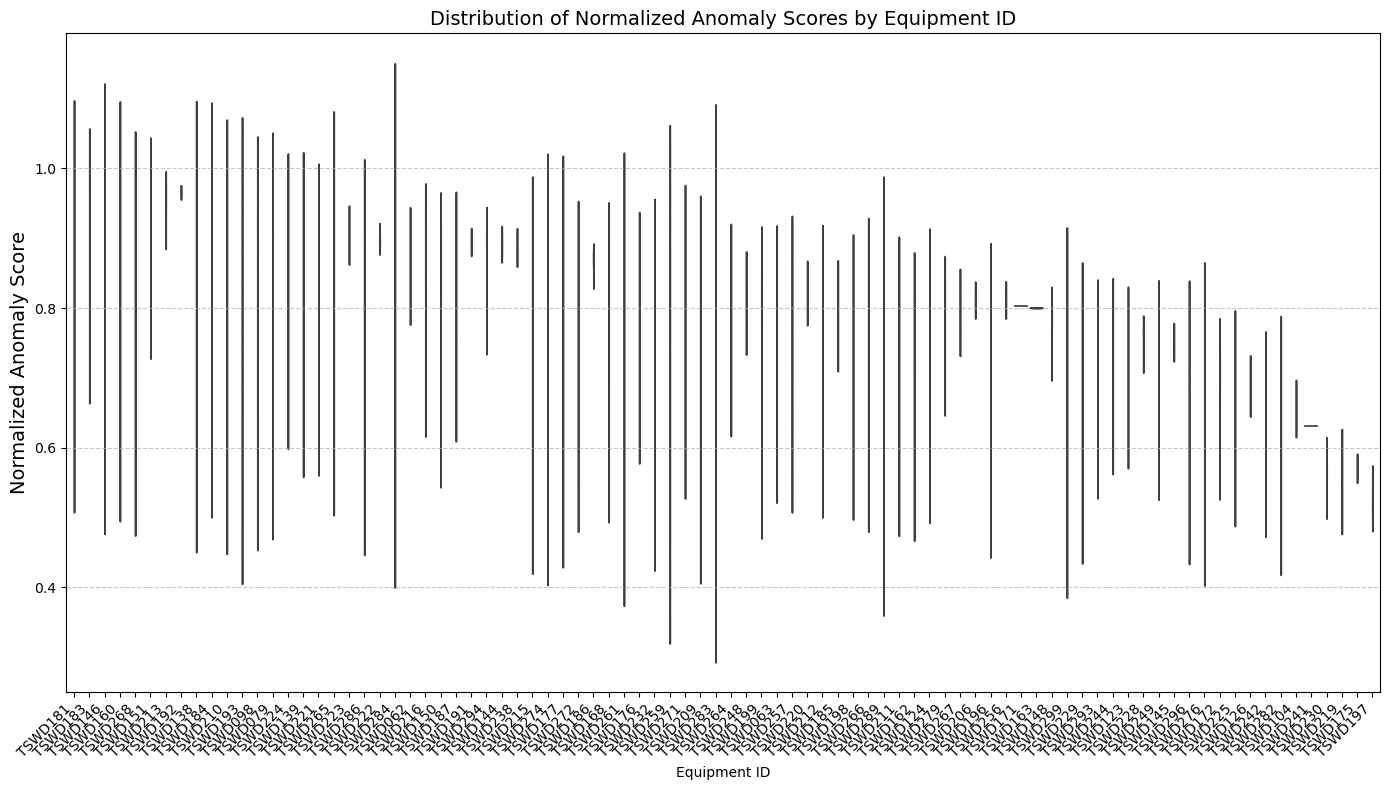

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style and size
plt.figure(figsize=(14, 8))

# Create violin plot (shows distribution density)
sns.violinplot(
    x='EquipID',
    y='AnomalyScore_normalized',
    data=anomalies_df,
    inner='quartile'  # Adds quartile lines inside the violin
)

# Improve readability
plt.title('Distribution of Normalized Anomaly Scores by Equipment ID', fontsize=14)
plt.xlabel('Equipment ID', fontsize=10)
plt.ylabel('Normalized Anomaly Score', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

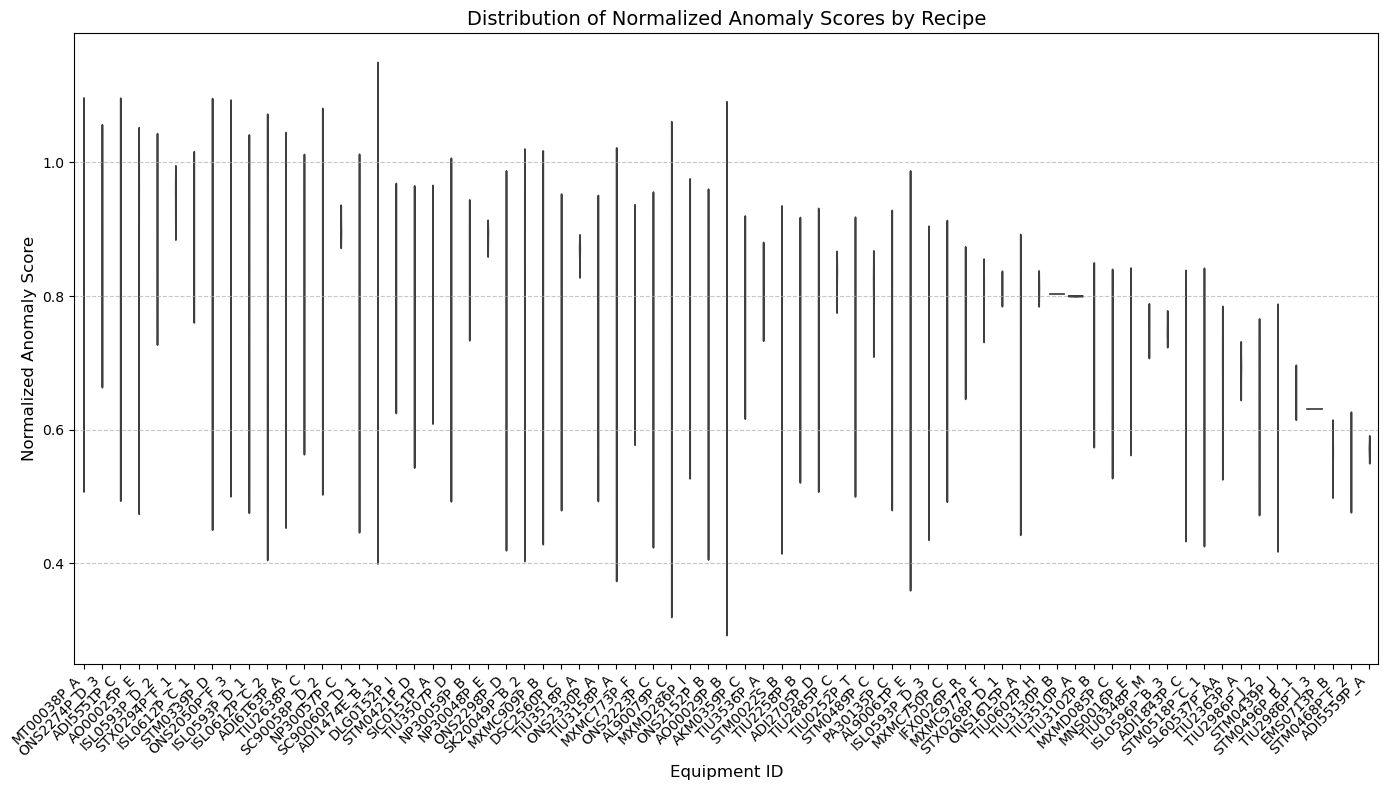

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style and size
plt.figure(figsize=(14, 8))

# Create violin plot (shows distribution density)
sns.violinplot(
    x='Recipe',
    y='AnomalyScore_normalized',
    data=anomalies_df,
    inner='quartile'  # Adds quartile lines inside the violin
)

# Improve readability
plt.title('Distribution of Normalized Anomaly Scores by Recipe', fontsize=14)
plt.xlabel('Equipment ID', fontsize=12)
plt.ylabel('Normalized Anomaly Score', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [21]:
# Record end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Processing time: {elapsed_time:.6f} seconds")

Processing time: 11.921427 seconds
